<a href="https://colab.research.google.com/github/rojre1979/AI_References_2022/blob/main/Capstone1_Blurry_Notblurry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

In [3]:
!unzip /content/drive/MyDrive/blurry_vs_not_blurry-20221027T065507Z-001.zip

Archive:  /content/drive/MyDrive/blurry_vs_not_blurry-20221027T065507Z-001.zip
  inflating: blurry_vs_not_blurry/notblurry/28_0_7779.jpg  
  inflating: blurry_vs_not_blurry/notblurry/26_0_7136.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_4878.jpg  
  inflating: blurry_vs_not_blurry/notblurry/27_0_7463.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_272.jpg  
  inflating: blurry_vs_not_blurry/notblurry/29_0_8637.jpg  
  inflating: blurry_vs_not_blurry/notblurry/28_0_6893.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_3992.jpg  
  inflating: blurry_vs_not_blurry/notblurry/31_0_7797.jpg  
  inflating: blurry_vs_not_blurry/notblurry/29_0_1951.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_8343.jpg  
  inflating: blurry_vs_not_blurry/notblurry/29_0_1230.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_5795.jpg  
  inflating: blurry_vs_not_blurry/notblurry/30_0_1259.jpg  
  inflating: blurry_vs_not_blurry/notblurry/31_0_5129.jpg  
  inflating: blurry_vs

In [4]:
# Blurry vs Not Blurry
path = Path("/content/blurry_vs_not_blurry")

In [5]:
files_blurry = get_image_files(path/"blurry")
files_notblurry = get_image_files(path/"notblurry")
files = files_blurry + files_notblurry
print(files)

[Path('/content/blurry_vs_not_blurry/blurry/27.jpg'), Path('/content/blurry_vs_not_blurry/blurry/28_0_4942.jpg'), Path('/content/blurry_vs_not_blurry/blurry/15_0_4471.jpg'), Path('/content/blurry_vs_not_blurry/blurry/19_0_9222.jpg'), Path('/content/blurry_vs_not_blurry/blurry/4s_0_4338.jpg'), Path('/content/blurry_vs_not_blurry/blurry/30_0_5636.jpg'), Path('/content/blurry_vs_not_blurry/blurry/12_0_3751.jpg'), Path('/content/blurry_vs_not_blurry/blurry/3_0_1603.jpg'), Path('/content/blurry_vs_not_blurry/blurry/5_0_7444.jpg'), Path('/content/blurry_vs_not_blurry/blurry/9_0_4995.jpg'), Path('/content/blurry_vs_not_blurry/blurry/29_0_6794.jpg'), Path('/content/blurry_vs_not_blurry/blurry/13_0_7510.jpg'), Path('/content/blurry_vs_not_blurry/blurry/21_0_8122.jpg'), Path('/content/blurry_vs_not_blurry/blurry/17_0_3826.jpg'), Path('/content/blurry_vs_not_blurry/blurry/14_0_7428.jpg'), Path('/content/blurry_vs_not_blurry/blurry/29_0_9262.jpg'), Path('/content/blurry_vs_not_blurry/blurry/20.jpg

In [6]:
def label_func(f): 
  return f.as_posix().split("/")[-2]

In [7]:
image_df = pd.DataFrame({"path":files,
                         "label":map(label_func, files)})

In [8]:
image_df

,path,label
0,/content/blurry_vs_not_blurry/blurry/27.jpg,blurry
1,/content/blurry_vs_not_blurry/blurry/28_0_4942.jpg,blurry
2,/content/blurry_vs_not_blurry/blurry/15_0_4471.jpg,blurry
3,/content/blurry_vs_not_blurry/blurry/19_0_9222.jpg,blurry
4,/content/blurry_vs_not_blurry/blurry/4s_0_4338.jpg,blurry
...,...,...
417,/content/blurry_vs_not_blurry/notblurry/16_0_3070.jpg,notblurry
418,/content/blurry_vs_not_blurry/notblurry/26_0_3008.jpg,notblurry
419,/content/blurry_vs_not_blurry/notblurry/16_0_7116.jpg,notblurry
420,/content/blurry_vs_not_blurry/notblurry/15_0_6706.jpg,notblurry


In [9]:
dls = ImageDataLoaders.from_df(image_df, path="/", item_tfms=Resize(224), valid_pct=0.20)

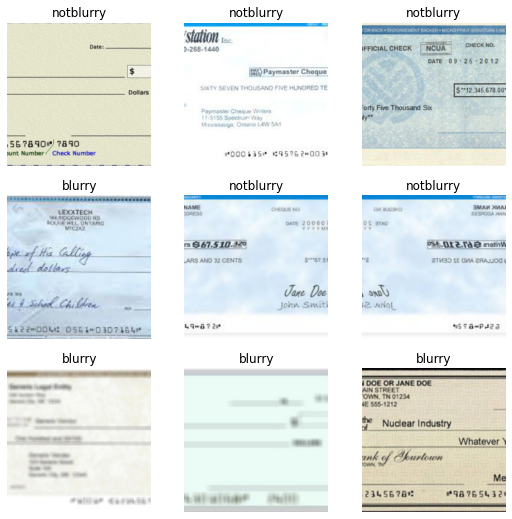

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet34, metrics=[error_rate, accuracy])
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.857135,1.314264,0.392857,0.607143,00:10


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.336296,0.605730,0.202381,0.797619,00:04


In [12]:
learn.predict(files[0])

('blurry', TensorBase(0), TensorBase([0.8931, 0.1069]))

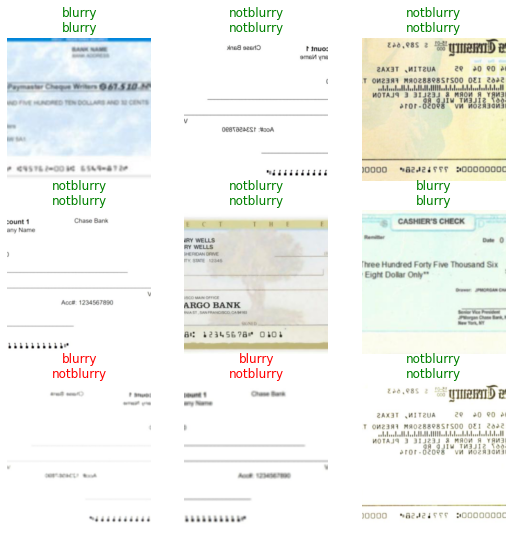

In [13]:
learn.show_results()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.129202,0.268850,0.107143,0.892857,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.228211,0.158668,0.071429,0.928571,00:04
1,0.212680,0.141419,0.059524,0.940476,00:04


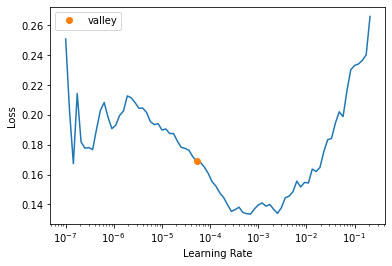

In [15]:
best_learning_rate = learn.lr_find()
learn.fine_tune(2, best_learning_rate[0])

In [16]:
best_learning_rate[0]

5.248074739938602e-05

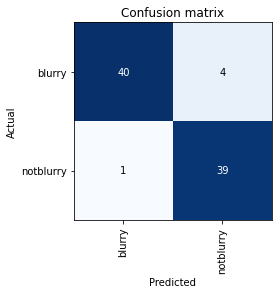

In [17]:
classif_interp = ClassificationInterpretation.from_learner(learn)
classif_interp.plot_confusion_matrix()

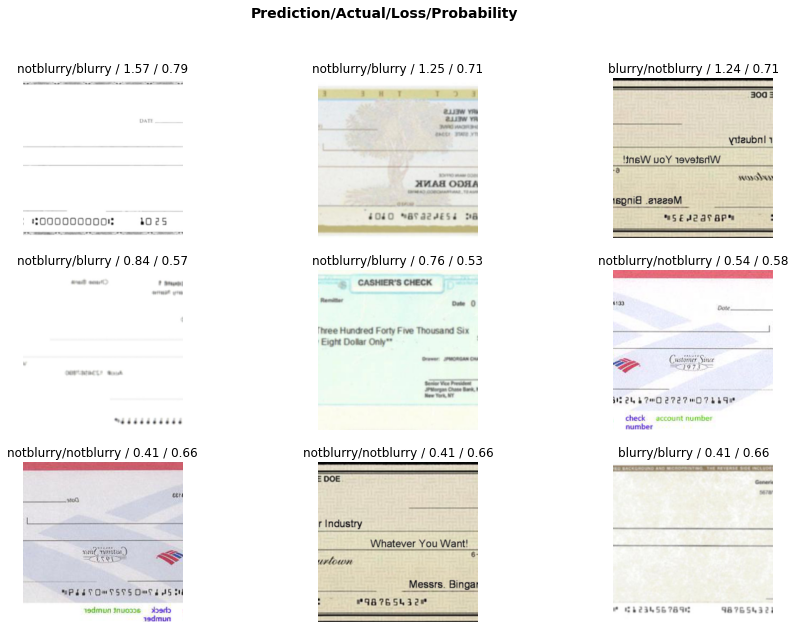

In [18]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))